In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

## 1. Read the data from CSV file / Clean Data

In [2]:
#import dataset
df = pd.read_csv('project_dataset.csv',index_col="EmployeeID")

df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


### Understanding the data and check data quality

In [3]:
df.shape

(1470, 19)

In [4]:
# Detect missing value
df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [5]:
# Trace and check duplicate rows

df[df.duplicated(keep=False)]

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,


In [6]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

## Exploratory data analysis (EDA)

### Univariate Analysis

In [7]:
## Numerical
df.select_dtypes(include=['number']).dtypes

Age                        int64
MonthlyIncome              int64
JobSatisfaction            int64
Bonus                      int64
DistanceFromHome           int64
Education                  int64
EnvSatisfaction            int64
PerformanceRating          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsSinceLastPromotion    int64
dtype: object

In [8]:
## Categorical
df.select_dtypes(include=['object']).dtypes

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
Attrition         object
dtype: object

In [9]:
df.describe()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,Education,EnvSatisfaction,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,2.728571,20479.501361,9.192517,2.912925,2.721769,3.153741,2.799320,7.008163,2.187755
std,9.135373,4707.956783,1.102846,15066.272964,8.106864,1.024165,1.093082,0.360824,1.289271,6.126525,3.222430
min,18.000000,1009.000000,1.000000,3027.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,2.000000,9333.750000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,36.000000,4919.000000,3.000000,15484.500000,7.000000,3.000000,3.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,8379.000000,4.000000,26103.750000,14.000000,4.000000,4.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,19999.000000,4.000000,79892.000000,29.000000,5.000000,4.000000,4.000000,6.000000,40.000000,15.000000


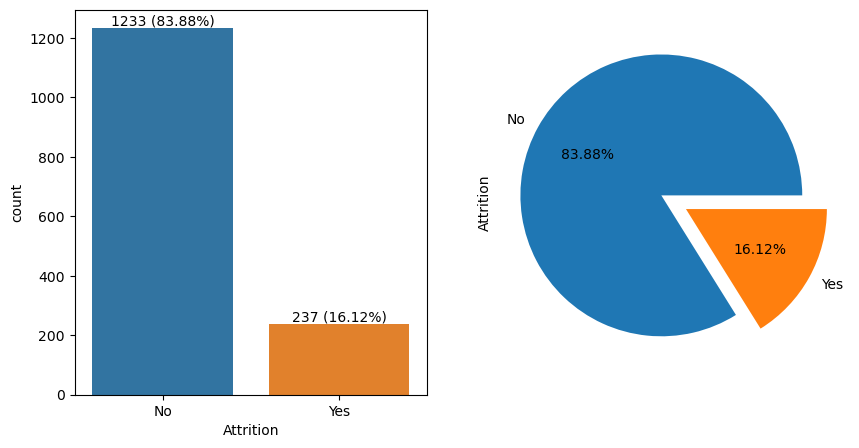

No     1233
Yes     237
Name: Attrition, dtype: int64


In [10]:
# Attrition (Target variable) proportion 

att_df = df['Attrition'].value_counts()
rel_att_df = round(df['Attrition'].value_counts(normalize = True)*100,2)

plt.figure(figsize = (10,5))
# Plotting bar chart

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Attrition',data=df, order=att_df.index)
lbls = [f"{p[0]} ({p[1]:.2f}%)" for p in zip(att_df, rel_att_df)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# plotting pie chart 

plt.subplot(1, 2, 2)
rel_att_df.plot(kind='pie',autopct='%.2f%%',explode = [0.1,0.1])



plt.show()
print(att_df)

### Interpretation: The dataset indicates that 16.12% of the employees left the organization while 83.88% of the employees are still with it.

## 2. Numerical analysis

In this section I have done the univariate analysis i.e. I have analysed the range or distribution of the values that various features take. To better analyze the results I have plotted various graphs and visualizations wherever necessary.

In [11]:
def num_uni(col,cbin):

    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": ( .20, .80)})
 
    # Add a graph in each part
    
    sns.histplot(x=df[col],bins=cbin, ax=ax_hist)
    ax_box.set(xlabel='')
    ax_box.set_title('Distribution of {}'.format(col))

    plt.show()

    skew_age = round(stat.skew(df[col]),3)
    print('Skewness =',skew_age)
    print('')
    
    print(df[col].describe().round(2))
    
    return

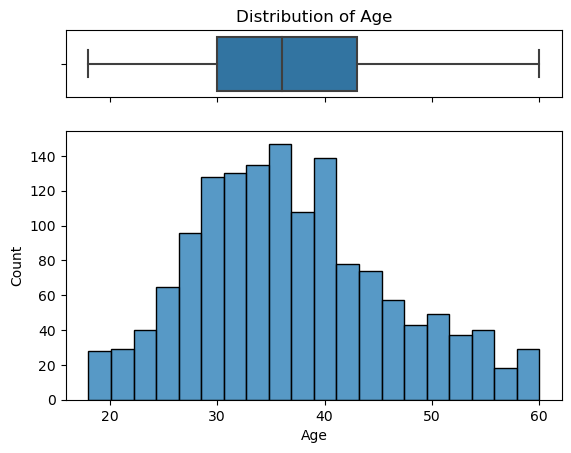

Skewness = 0.413

count    1470.00
mean       36.92
std         9.14
min        18.00
25%        30.00
50%        36.00
75%        43.00
max        60.00
Name: Age, dtype: float64


In [12]:
num_uni('Age',20)

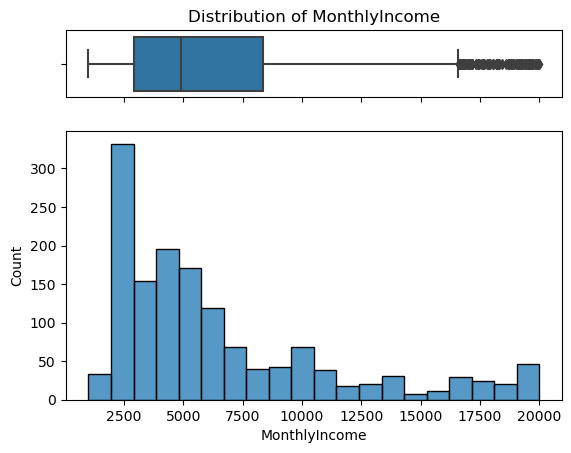

Skewness = 1.368

count     1470.00
mean      6502.93
std       4707.96
min       1009.00
25%       2911.00
50%       4919.00
75%       8379.00
max      19999.00
Name: MonthlyIncome, dtype: float64


In [13]:
num_uni('MonthlyIncome',20)

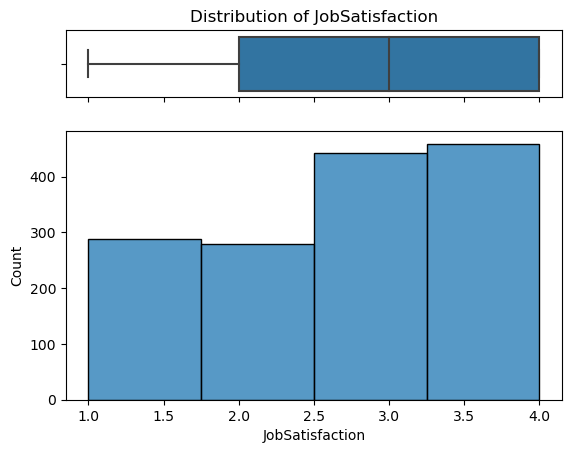

Skewness = -0.329

count    1470.00
mean        2.73
std         1.10
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         4.00
Name: JobSatisfaction, dtype: float64


In [14]:
num_uni('JobSatisfaction',4)

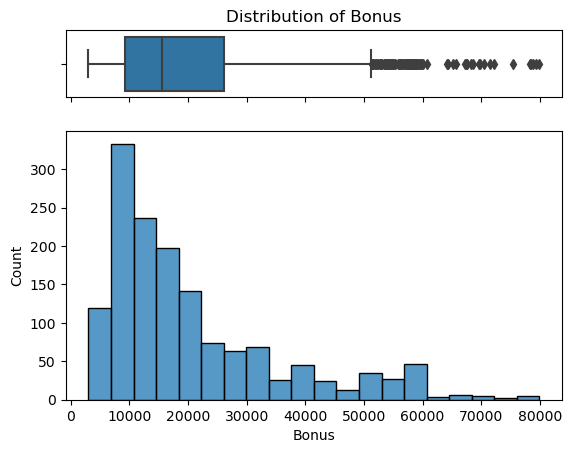

Skewness = 1.458

count     1470.00
mean     20479.50
std      15066.27
min       3027.00
25%       9333.75
50%      15484.50
75%      26103.75
max      79892.00
Name: Bonus, dtype: float64


In [15]:
num_uni('Bonus',20)

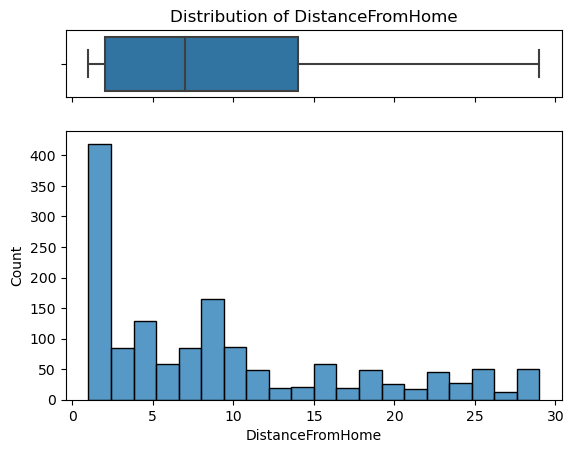

Skewness = 0.957

count    1470.00
mean        9.19
std         8.11
min         1.00
25%         2.00
50%         7.00
75%        14.00
max        29.00
Name: DistanceFromHome, dtype: float64


In [16]:
num_uni('DistanceFromHome',20)

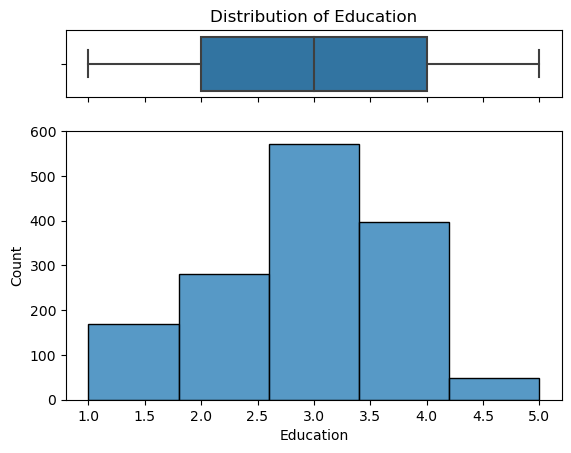

Skewness = -0.289

count    1470.00
mean        2.91
std         1.02
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00
Name: Education, dtype: float64


In [17]:
num_uni('Education',5)

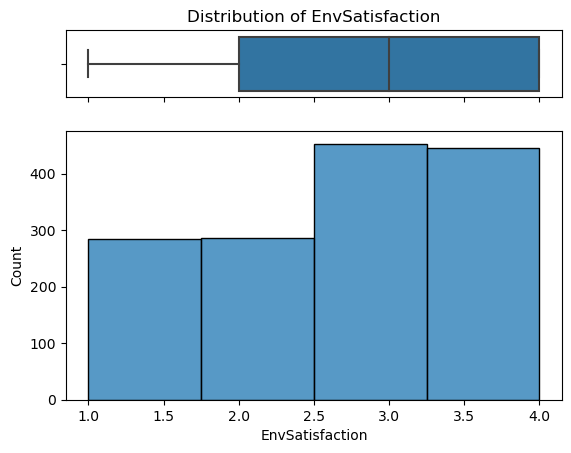

Skewness = -0.321

count    1470.00
mean        2.72
std         1.09
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         4.00
Name: EnvSatisfaction, dtype: float64


In [18]:
num_uni('EnvSatisfaction',4)

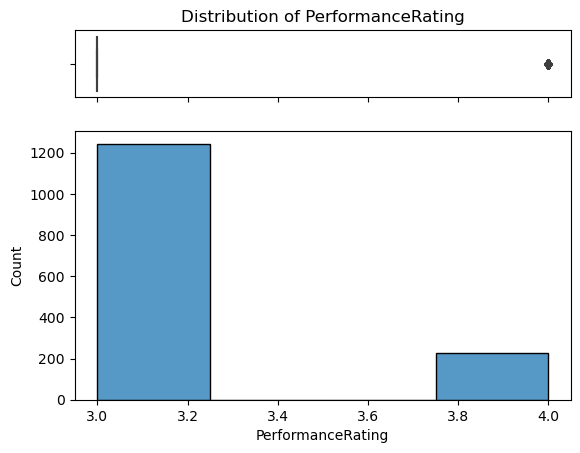

Skewness = 1.92

count    1470.00
mean        3.15
std         0.36
min         3.00
25%         3.00
50%         3.00
75%         3.00
max         4.00
Name: PerformanceRating, dtype: float64


In [19]:
num_uni('PerformanceRating',4)

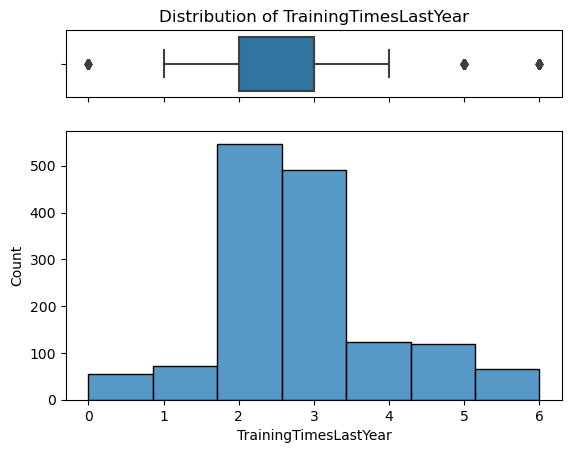

Skewness = 0.553

count    1470.00
mean        2.80
std         1.29
min         0.00
25%         2.00
50%         3.00
75%         3.00
max         6.00
Name: TrainingTimesLastYear, dtype: float64


In [20]:
num_uni('TrainingTimesLastYear',7)

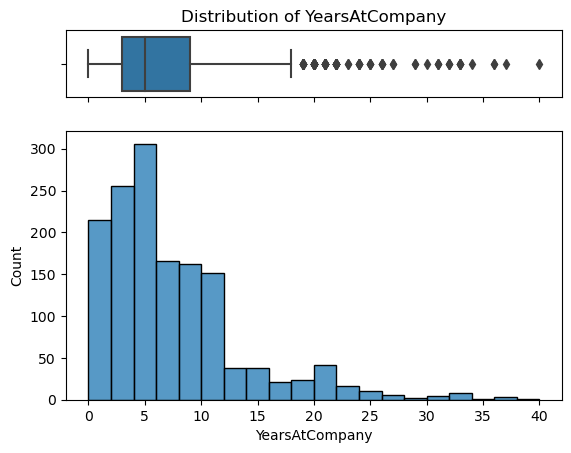

Skewness = 1.763

count    1470.00
mean        7.01
std         6.13
min         0.00
25%         3.00
50%         5.00
75%         9.00
max        40.00
Name: YearsAtCompany, dtype: float64


In [21]:
num_uni('YearsAtCompany',20)

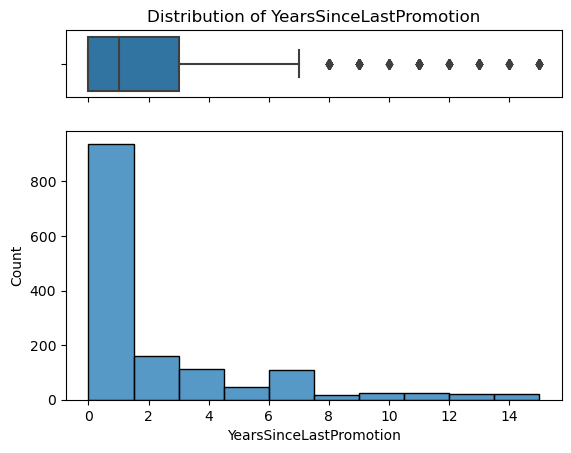

Skewness = 1.982

count    1470.00
mean        2.19
std         3.22
min         0.00
25%         0.00
50%         1.00
75%         3.00
max        15.00
Name: YearsSinceLastPromotion, dtype: float64


In [22]:
num_uni('YearsSinceLastPromotion',10)

Now analyze the various categorical features. We use pie chart for easy visualization.

## Categorical analysis

In [23]:
## build function

def plot_pie(attr,labels=None):
    df[attr].value_counts(normalize = True).plot(kind='pie',autopct='%.2f%%')
    print(df[attr].value_counts())
    
    return

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


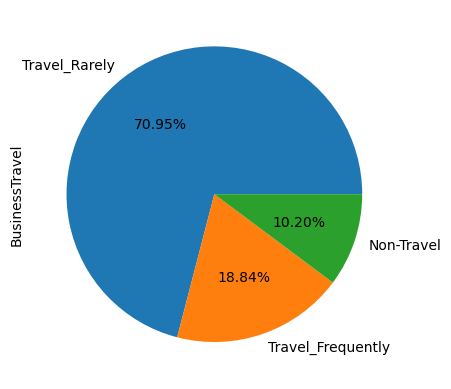

In [24]:
plot_pie('BusinessTravel')

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


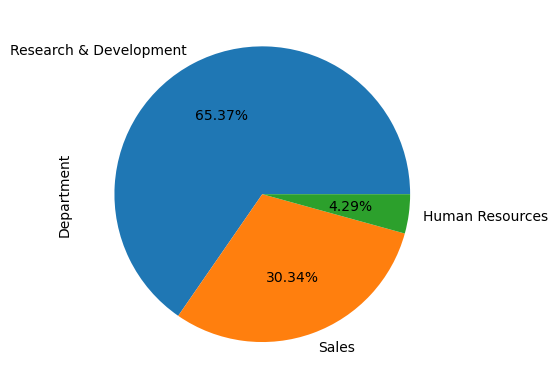

In [25]:
plot_pie('Department')

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


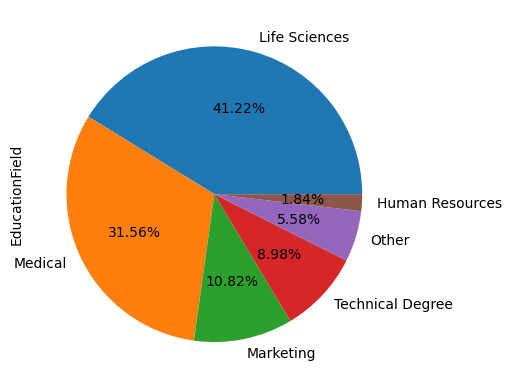

In [26]:
plot_pie('EducationField')

Male      882
Female    588
Name: Gender, dtype: int64


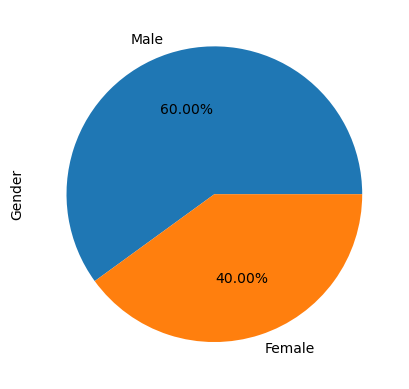

In [27]:
plot_pie('Gender')

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


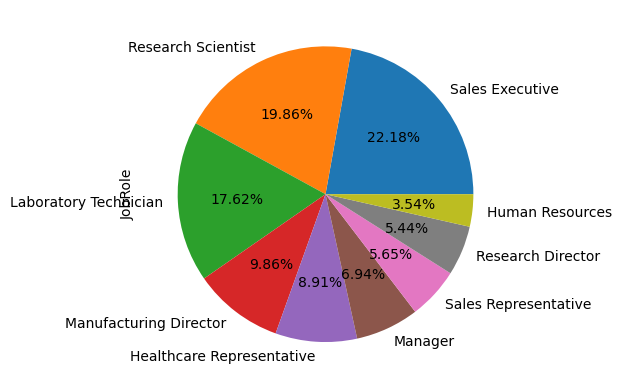

In [28]:
plot_pie('JobRole')

Since unable to analize well , we use bar plot to visualize

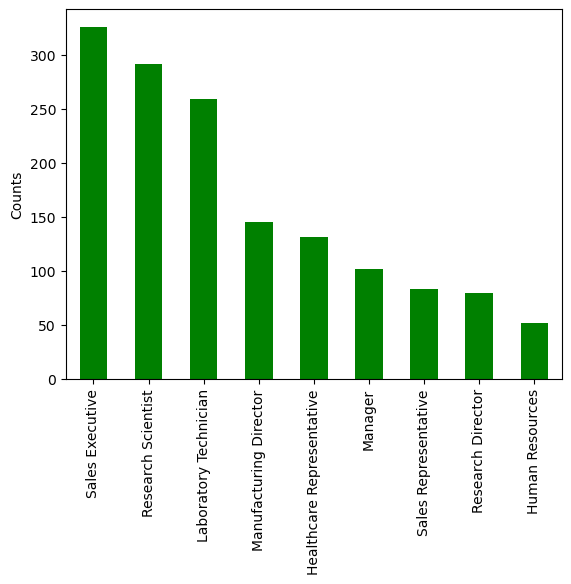

In [29]:
df['JobRole'].value_counts().plot(kind='bar',color='g')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


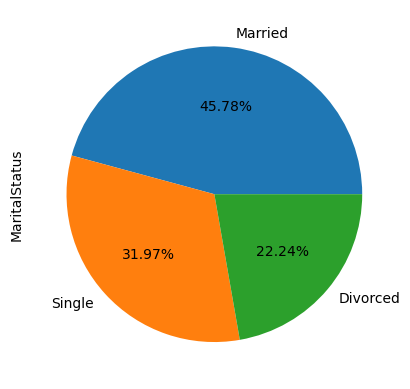

In [30]:
plot_pie('MaritalStatus')

No     1054
Yes     416
Name: OverTime, dtype: int64


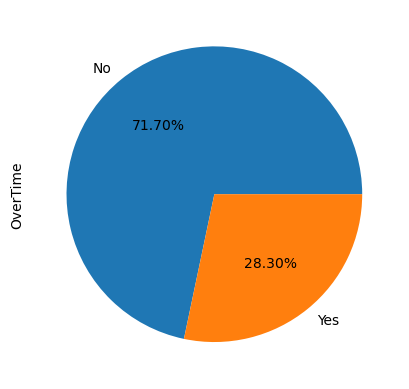

In [31]:
plot_pie('OverTime')

## 3 . Multivariate Analysis

In [32]:
import scipy.stats as stats

## def function (only be use for check relationship with 'Attrition')

# boxplot with table
def plot_att(col,labels=None):
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Attrition',y=col,data=df)
    plt.grid(linestyle='-.')
    plt.show()
    print(df.groupby('Attrition',as_index=False)[col].mean().round(2))
    
    return

# cross tab
def cross_tab(col):

    crossTab = pd.crosstab(index=df[col], columns=df['Attrition'])
    pcent_tab = pd.crosstab(index=df[col], columns=df['Attrition'],normalize='index')*100
    
    plt.figure(figsize = (6,3))
    # Plotting bar chart

    pcent_tab.plot(kind='bar')
    plt.ylabel('Percent,%')
    plt.grid(linestyle='-.')
    plt.show()
   
    print(crossTab)
    
    return


#Levene Test

def levene_test(col):
    w_stats, p_value = stats.levene(df[col][df['Attrition']=='Yes'],
                                    df[col][df['Attrition']=='No'],
                                    center = 'mean')
    print ('P-value:', p_value)
    
    if p_value > 0.05:
        print("Equal_var = True")
    else:
        print("Equal_var = False")
    
    return

# T-test 

def t_test(col,var):
    w_stats, p_value = stats.ttest_ind(df[col][df['Attrition']=='Yes'],
                                       df[col][df['Attrition']=='No'],
                                       equal_var=var)
    print ('P-value:', p_value)
    
    if p_value > 0.05:
        print("There is no relationship between {} and {}".format(col,'Attrition'))
    else:
        print("There is significant different between {} and {}".format(col,'Attrition'))
    
    return

def chi2_test(col):
    chi2 = pd.crosstab(index=df[col], columns=df['Attrition'])
    c, p, dof, expected = stats.chi2_contingency(chi2)
    
    print('P-value:', p)
    print('')
    
    if p > 0.05:
        print("There is no relationship between {} and {}".format(col,'Attrition'))
    else:
        print("There is significant different between {} and {}".format(col,'Attrition'))
    
    return


### 1. Relation between Attrition with Age

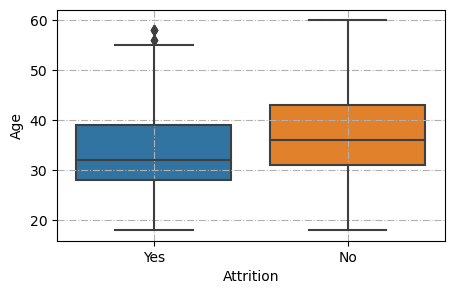

  Attrition    Age
0        No  37.56
1       Yes  33.61


In [33]:
plot_att('Age')

In [34]:
levene_test('Age')

P-value: 0.2819916793250208
Equal_var = True


In [35]:
t_test('Age',True)

P-value: 8.356308021103587e-10
There is significant different between Age and Attrition


In [36]:
x = df.groupby('Attrition',as_index=False)['Age']
x.describe()

Attrition  0           No
           1          Yes
count      0       1233.0
           1        237.0
mean       0    37.561233
           1    33.607595
std        0      8.88836
           1      9.68935
min        0         18.0
           1         18.0
25%        0         31.0
           1         28.0
50%        0         36.0
           1         32.0
75%        0         43.0
           1         39.0
max        0         60.0
           1         58.0
dtype: object

### 2. Relation between Attrition with Monthly Income

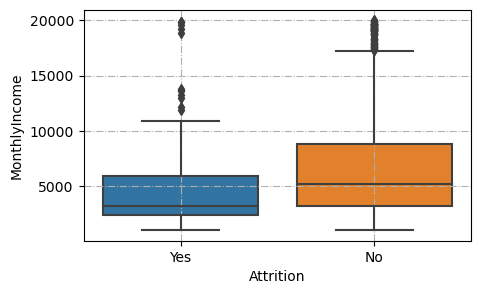

  Attrition  MonthlyIncome
0        No        6832.74
1       Yes        4787.09

P-value: 3.29070575711061e-07
Equal_var = False


In [37]:
plot_att('MonthlyIncome')
print('')
levene_test('MonthlyIncome')

In [38]:
t_test('MonthlyIncome',False)

P-value: 4.433588628286071e-13
There is significant different between MonthlyIncome and Attrition


In [39]:
x1 = df.groupby('Attrition',as_index=False)['MonthlyIncome']
x1.describe()

Attrition  0             No
           1            Yes
count      0         1233.0
           1          237.0
mean       0    6832.739659
           1    4787.092827
std        0    4818.208001
           1    3640.210367
min        0         1051.0
           1         1009.0
25%        0         3211.0
           1         2373.0
50%        0         5204.0
           1         3202.0
75%        0         8834.0
           1         5916.0
max        0        19999.0
           1        19859.0
dtype: object

### 3. Relation between Attrition with Job Satisfaction

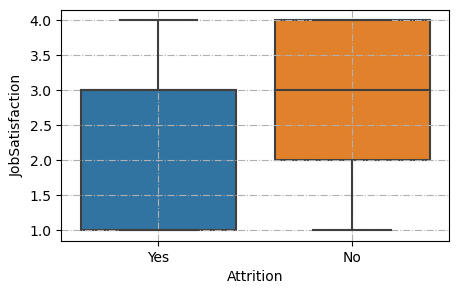

  Attrition  JobSatisfaction
0        No             2.78
1       Yes             2.47

P-value: 0.11950724122969081
Equal_var = True


In [40]:
plot_att('JobSatisfaction')
print('')
levene_test('JobSatisfaction')

In [41]:
t_test('JobSatisfaction',True)

P-value: 7.043066741731151e-05
There is significant different between JobSatisfaction and Attrition


### 4. Relation between Attrition with Bonus

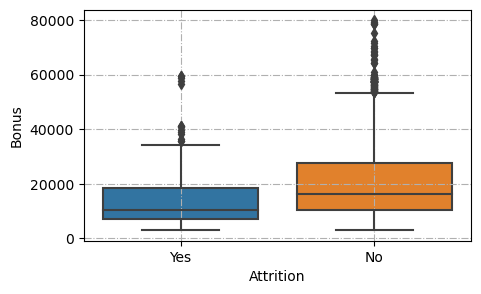

  Attrition     Bonus
0        No  21543.95
1       Yes  14941.67

P-value: 2.2502347973082613e-08
Equal_var = False


In [42]:
plot_att('Bonus')
print('')
levene_test('Bonus')

In [43]:
t_test('Bonus',False)

P-value: 3.692333845137077e-14
There is significant different between Bonus and Attrition


In [44]:
x2 = df.groupby('Attrition',as_index=False)['Bonus']
x2.describe()

Attrition  0              No
           1             Yes
count      0          1233.0
           1           237.0
mean       0    21543.951338
           1    14941.666667
std        0    15498.635008
           1    11056.662884
min        0          3153.0
           1          3027.0
25%        0         10341.0
           1          7296.0
50%        0         16131.0
           1         10392.0
75%        0         27624.0
           1         18324.0
max        0         79892.0
           1         59577.0
dtype: object

### 5. Relation between Attrition with DistanceFromHome

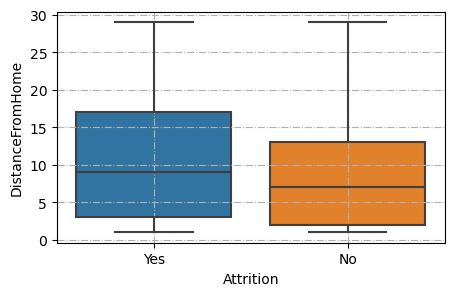

  Attrition  DistanceFromHome
0        No              8.92
1       Yes             10.63

P-value: 0.025879557896104303
Equal_var = False


In [45]:
plot_att('DistanceFromHome')
print('')
levene_test('DistanceFromHome')

In [46]:
t_test('DistanceFromHome',False)

P-value: 0.004136511971511406
There is significant different between DistanceFromHome and Attrition


In [47]:
x3 = df.groupby('Attrition',as_index=False)['DistanceFromHome']
x3.describe()

Attrition  0           No
           1          Yes
count      0       1233.0
           1        237.0
mean       0     8.915653
           1    10.632911
std        0     8.012633
           1     8.452525
min        0          1.0
           1          1.0
25%        0          2.0
           1          3.0
50%        0          7.0
           1          9.0
75%        0         13.0
           1         17.0
max        0         29.0
           1         29.0
dtype: object

### 6. Relation between Attrition with Education

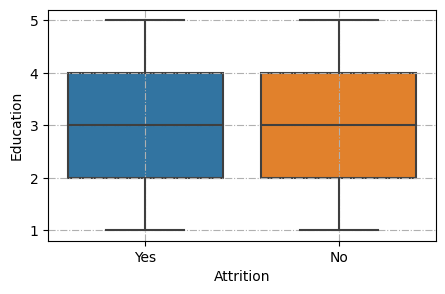

  Attrition  Education
0        No       2.93
1       Yes       2.84

P-value: 0.9880461043703124
Equal_var = True


In [48]:
plot_att('Education')
print('')
levene_test('Education')

In [49]:
t_test('Education',True)

P-value: 0.22931520332230415
There is no relationship between Education and Attrition


### 7. Relation between Attrition with EnvSatisfaction

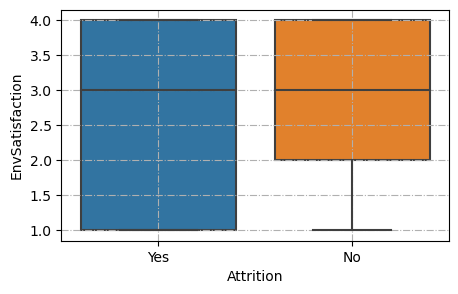

  Attrition  EnvSatisfaction
0        No             2.77
1       Yes             2.46

P-value: 0.00022496812287863818
Equal_var = False


In [50]:
plot_att('EnvSatisfaction')
print('')
levene_test('EnvSatisfaction')

In [51]:
t_test('EnvSatisfaction',False)

P-value: 0.0002092053345883392
There is significant different between EnvSatisfaction and Attrition


### 8. Relation between Attrition with PerformanceRating

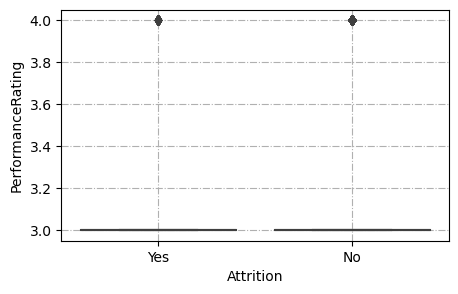

  Attrition  PerformanceRating
0        No               3.15
1       Yes               3.16

P-value: 0.8253162347750427
Equal_var = True


In [52]:
plot_att('PerformanceRating')
print('')
levene_test('PerformanceRating')

In [53]:
t_test('PerformanceRating',True)

P-value: 0.9118840421069003
There is no relationship between PerformanceRating and Attrition


### 9. Relation between Attrition with TrainingTimesLastYear 

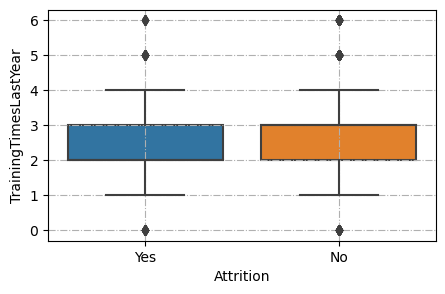

  Attrition  TrainingTimesLastYear
0        No                   2.83
1       Yes                   2.62

P-value: 0.9752512997636223
Equal_var = True


In [54]:
plot_att('TrainingTimesLastYear')
print('')
levene_test('TrainingTimesLastYear')

In [55]:
t_test('TrainingTimesLastYear',True)

P-value: 0.022578499737201205
There is significant different between TrainingTimesLastYear and Attrition


### 10. Relation between Attrition with YearsAtCompany  

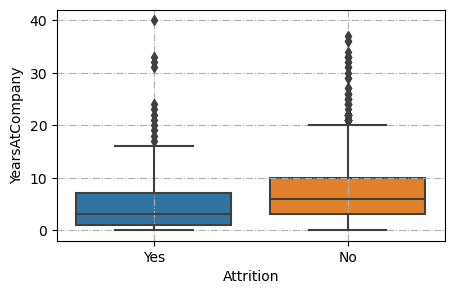

  Attrition  YearsAtCompany
0        No            7.37
1       Yes            5.13

P-value: 0.11370465713766563
Equal_var = True


In [56]:
plot_att('YearsAtCompany')
print('')
levene_test('YearsAtCompany')

In [57]:
t_test('YearsAtCompany',True)

P-value: 2.3188716103863033e-07
There is significant different between YearsAtCompany and Attrition


### 11. Relation between Attrition with YearsSinceLastPromotion  

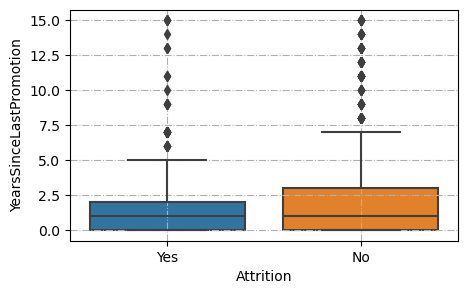

  Attrition  YearsSinceLastPromotion
0        No                     2.23
1       Yes                     1.95

P-value: 0.25687769398884447
Equal_var = True


In [58]:
plot_att('YearsSinceLastPromotion')
print('')
levene_test('YearsSinceLastPromotion')

In [59]:
t_test('YearsSinceLastPromotion',True)

P-value: 0.2057899591624936
There is no relationship between YearsSinceLastPromotion and Attrition


### 12. Relation between Attrition with BusinessTravel  

<Figure size 600x300 with 0 Axes>

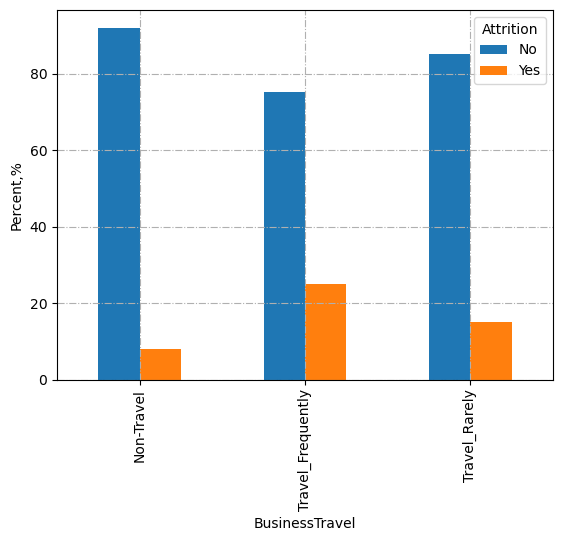

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156


In [60]:
cross_tab('BusinessTravel')

In [61]:
pcent_tab = round(pd.crosstab(index=df['BusinessTravel'], columns=df['Attrition'],normalize='index')*100,2)
print(pcent_tab)

Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96


In [62]:
chi2_test('BusinessTravel')

P-value: 5.608614476449931e-06

There is significant different between BusinessTravel and Attrition


### 13. Relation between Attrition with Department   

<Figure size 600x300 with 0 Axes>

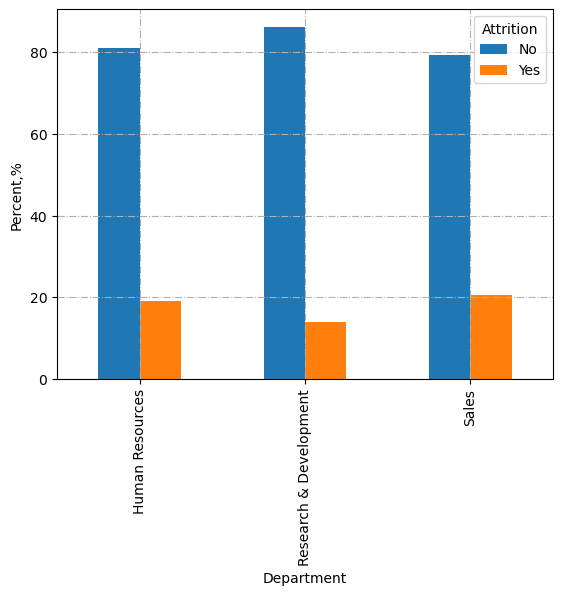

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


In [63]:
cross_tab('Department')

In [64]:
chi2_test('Department')

P-value: 0.004525606574479633

There is significant different between Department and Attrition


In [65]:
pcent_tab = round(pd.crosstab(index=df['Department'], columns=df['Attrition'],normalize='index')*100,2)
print(pcent_tab)

Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


### 14. Relation between Attrition with EducationField  

<Figure size 600x300 with 0 Axes>

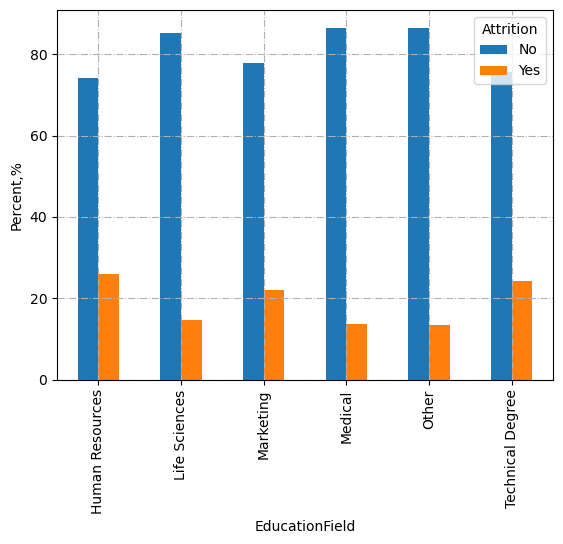

Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


In [66]:
cross_tab('EducationField')

In [67]:
chi2_test('EducationField')

P-value: 0.006773980139025212

There is significant different between EducationField and Attrition


In [68]:
crosstab = pd.crosstab([df.EducationField,df.Education],df.Attrition,normalize=True)*100
crosstab

Attrition                          No       Yes
EducationField   Education                     
Human Resources  1           0.068027  0.068027
                 2           0.136054  0.000000
                 3           0.816327  0.272109
                 4           0.272109  0.068027
                 5           0.068027  0.068027
Life Sciences    1           4.013605  0.544218
                 2           6.666667  1.224490
                 3          13.333333  2.517007
                 4          10.068027  1.700680
                 5           1.088435  0.068027
Marketing        1           0.680272  0.272109
                 2           1.224490  0.408163
                 3           2.993197  1.020408
                 4           2.925170  0.612245
                 5           0.612245  0.068027
Medical          1           3.605442  0.680272
                 2           5.714286  1.020408
                 3          10.748299  1.700680
                 4           6.190476  0.884354
                 5           1.020408  0.000000
Other            1           0.204082  0.136054
                 2           1.224490  0.068027
                 3           1.496599  0.136054
                 4           1.836735  0.408163
                 5           0.068027  0.000000
Technical Degree 1           0.884354  0.408163
                 2           1.224490  0.272109
                 3           2.789116  1.088435
                 4           1.836735  0.272109
                 5           0.068027  0.136054

### 15. Relation between Attrition with Gender  

<Figure size 600x300 with 0 Axes>

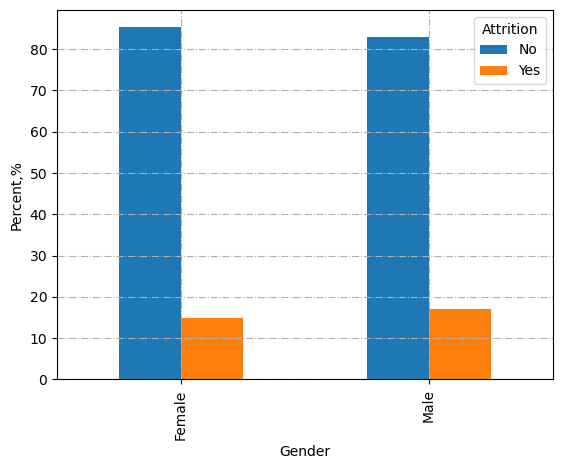

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


In [69]:
cross_tab('Gender')

In [70]:
chi2_test('Gender')

P-value: 0.29057244902890855

There is no relationship between Gender and Attrition


### 16. Relation between Attrition with JobRole  

<Figure size 600x300 with 0 Axes>

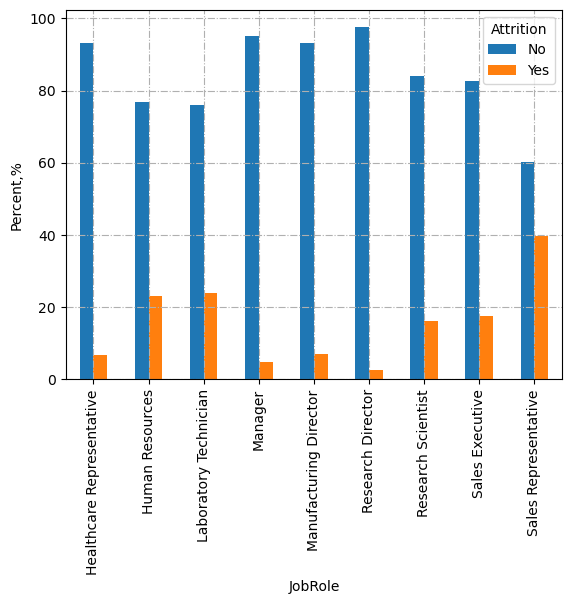

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


In [71]:
cross_tab('JobRole')

In [72]:
chi2_test('JobRole')

P-value: 2.752481638050657e-15

There is significant different between JobRole and Attrition


### 17. Relation between Attrition with MaritalStatus  

<Figure size 600x300 with 0 Axes>

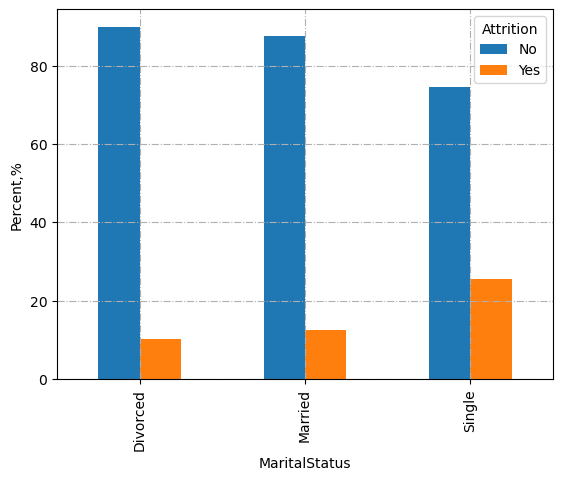

Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


In [73]:
cross_tab('MaritalStatus')

In [74]:
chi2_test('MaritalStatus')

P-value: 9.45551106034083e-11

There is significant different between MaritalStatus and Attrition


In [75]:
clondf = df[['Age', 'Attrition']]

# Define the age groups and corresponding labels
age_groups = [18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84','85++']

# Categorize the 'Age' column
clondf['Age_Category'] = pd.cut(clondf['Age'], bins=age_groups, labels=age_labels, right=False)

# Print the updated DataFrame
clondf.head()

,Age,Attrition,Age_Category
EmployeeID,,,
1,41,Yes,35-44
2,49,No,45-54
4,37,Yes,35-44
5,33,No,25-34
7,27,No,25-34


In [76]:
crosstab = pd.crosstab([df.MaritalStatus,clondf.Age_Category],df.Attrition)
x = crosstab
x

Attrition                    No  Yes
MaritalStatus Age_Category          
Divorced      18-24          10    1
              25-34         113   14
              35-44         105   14
              45-54          51    3
              55-64          15    1
Married       18-24          21    9
              25-34         204   39
              35-44         221   18
              45-54         114   13
              55-64          29    5
Single        18-24          28   28
              25-34         125   59
              35-44         128   19
              45-54          55    9
              55-64          14    5

### 18. Relation between Attrition with OverTime

<Figure size 600x300 with 0 Axes>

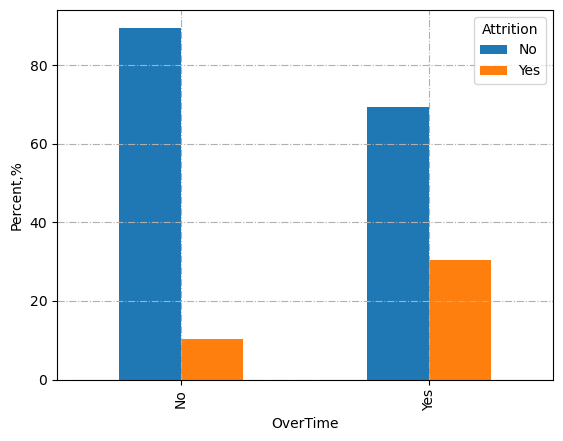

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


In [77]:
cross_tab('OverTime')

In [78]:
chi2_test('OverTime')

P-value: 8.15842372153832e-21

There is significant different between OverTime and Attrition


In [79]:
ct1 = pd.crosstab([df.JobRole,df.Department],df.Attrition,normalize=False)
ct1.round(2)

Attrition                                          No  Yes
JobRole                   Department                      
Healthcare Representative Research & Development  122    9
Human Resources           Human Resources          40   12
Laboratory Technician     Research & Development  197   62
Manager                   Human Resources          11    0
                          Research & Development   51    3
                          Sales                    35    2
Manufacturing Director    Research & Development  135   10
Research Director         Research & Development   78    2
Research Scientist        Research & Development  245   47
Sales Executive           Sales                   269   57
Sales Representative      Sales                    50   33

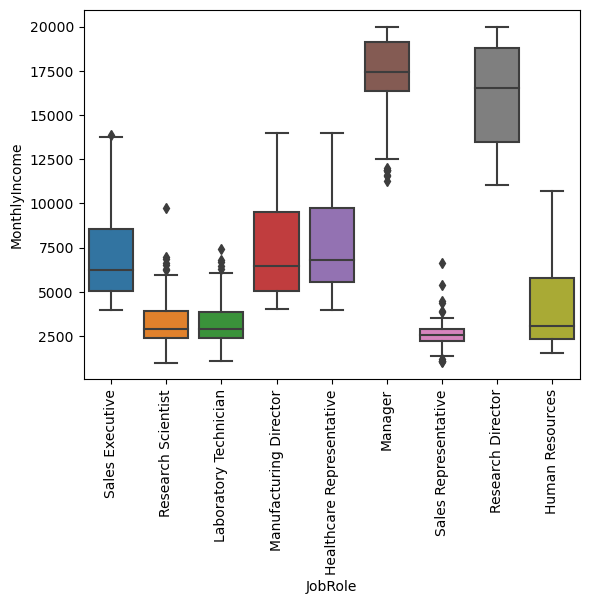

In [80]:
#Compare MonthlyIncome variation between JobRole class
sns.boxplot(x='JobRole',y='MonthlyIncome',data=df)
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

### Summary of EDA findings for Multivariate Analysis
Variables that affecting the response variable, Attrition are listed as follows:
- Age                        
- MonthlyIncome              
- JobSatisfaction            
- Bonus                      
- DistanceFromHome           
- EnvSatisfaction            
- TrainingTimesLastYear      
- YearsAtCompany             
- BusinessTravel    
- Department        
- EducationField    
- JobRole           
- MaritalStatus     
- OverTime          

## 4 . Feature Selection

### Create Dataframe for Variable of Interest

In [81]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [82]:
df_ml=df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
          'Department', 'DistanceFromHome', 'EducationField',
          'EnvSatisfaction', 'JobRole', 'MaritalStatus',
          'TrainingTimesLastYear', 'YearsAtCompany',
          'OverTime', 'Attrition']]
df_ml.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No,No


In [83]:
# Assigned Input and Output 
x = df_ml.iloc[:,:-1]
y = df_ml.iloc[:,-1]

In [84]:
x.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime
EmployeeID,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No


### Handling Categorical Variable

In [85]:
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [86]:
x.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,41,5993,4,17979,1,2,0,6,0,1,...,0,0,0,0,0,1,0,0,1,1
2,49,5130,2,20520,8,3,3,10,1,0,...,0,0,0,0,1,0,0,1,0,0
4,37,2090,3,6270,2,4,3,0,0,1,...,1,0,0,0,0,0,0,0,1,1
5,33,2909,3,8727,3,4,3,8,1,0,...,0,0,0,0,1,0,0,1,0,1
7,27,3468,2,10404,2,1,3,2,0,1,...,1,0,0,0,0,0,0,1,0,0


## Partitioning Dataset

In [87]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0, stratify = y)

In [88]:
# make a copy of dataset

x_train1 = x_train
x_test1 = x_test
y_train1 = y_train
y_test1 = y_test
x_train2 = x_train
x_test2 = x_test
y_train2 = y_train
y_test2 = y_test

In [89]:
x_train1.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1523,44,16328,1,48984,28,4,1,20,0,1,...,0,0,0,1,0,0,0,1,0,0
1212,40,4327,2,12981,2,2,2,0,1,0,...,0,0,0,0,0,1,0,1,0,0
110,34,4325,2,12975,1,1,2,5,0,1,...,0,0,1,0,0,0,0,1,0,0
615,40,10932,1,32796,28,3,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1161,37,5731,4,17193,25,3,2,6,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
x_train.shape

(1029, 28)

In [91]:
x_test.shape

(441, 28)

## Features Scaling for Train Set

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [93]:
x_train[1]

array([ 0.32796082, -0.46834793, -0.64118273, -0.50578176, -0.88376782,
       -0.65699204, -0.63416118, -1.13558423,  2.06807231, -1.5736427 ,
       -1.37198868,  1.50899638, -0.82545294, -0.34772839,  1.45539748,
       -0.25103093, -0.31521259, -0.18764666, -0.46818192, -0.27429019,
       -0.32444284, -0.24662673, -0.49422297,  1.89032625, -0.25321102,
        1.09485978, -0.68097495, -0.63245553])

### Train the Algorithm using Logistic Regression

In [94]:
#Train Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
class_model = LogisticRegression(random_state=0)
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

## 5. Apply Model with Test Set Scaled Inputs

### Feature Scaling for Test Set

In [95]:
x_test.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
916,28,4908,4,14724,5,1,3,4,0,1,...,0,0,0,0,0,1,0,0,1,0
1408,42,16799,1,50397,10,3,5,20,0,1,...,0,1,0,0,0,0,0,1,0,0
1233,60,5220,4,15660,7,2,3,11,0,1,...,0,0,0,0,0,1,0,0,0,1
1640,37,3936,2,11808,10,2,2,8,0,1,...,0,0,0,0,1,0,0,1,0,0
1133,36,7779,4,31116,18,1,0,11,0,0,...,0,0,1,0,0,0,0,0,1,0


In [96]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test =  scaler.transform(x_test)

### Apply Model with Scaled Test Set

In [97]:
# Apply for Test Set
y_pred=class_model.predict(x_test)

In [98]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(10)

,Actual,Predicted
EmployeeID,,
916,No,No
1408,No,No
1233,No,No
1640,No,No
1133,No,No
1073,No,No
132,No,No
649,No,No
163,Yes,No


## 6. Performance Evaluation

## Confusion Matrix

In [99]:
# Confusion Matrix
print(pd.crosstab(y_pred,y_test))

Attrition   No  Yes
row_0              
No         364   59
Yes          6   12


In [100]:
s1 = pd.crosstab(y_pred,y_test).sort_index(ascending=False)
s1 = s1[['Yes','No']]

print(s1)

Attrition  Yes   No
row_0              
Yes         12    6
No          59  364


In [101]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.86      0.98      0.92       370
         Yes       0.67      0.17      0.27        71

    accuracy                           0.85       441
   macro avg       0.76      0.58      0.59       441
weighted avg       0.83      0.85      0.81       441



### ROC Curve & AUC

In [102]:
from sklearn.metrics import roc_curve, auc

In [103]:
#Find the predicted probabilities using the test set
probs = class_model.predict_proba(x_test)
preds = probs[:,1]

In [104]:
#Find the FPR, TPR and threshold
fpr, tpr, threshold = roc_curve(y_test,preds, pos_label='Yes')

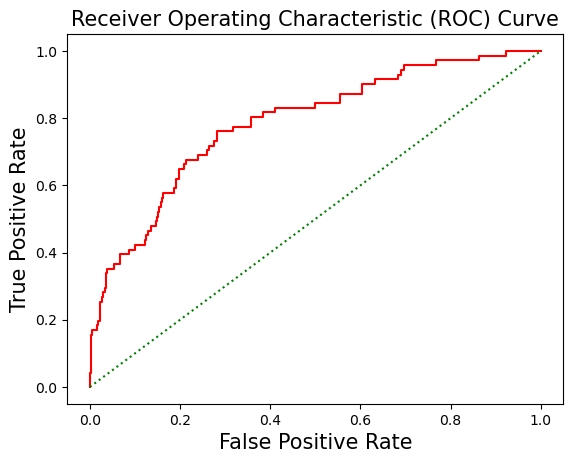

In [105]:
#Plotting the ROC
plt.plot(fpr,tpr, color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

In [106]:
#Calculate Area Under the Curver (AOC)
roc_auc = auc(fpr,tpr)
roc_auc.round(2)

0.79

## Naive Bayes

In [107]:
#Features Scaling for Train1 Set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train1)
x_train1 = scaler.transform(x_train1)

## Train the Algorithm using Naive Bayes

In [108]:
#####Train Naive Bayes Algorithm
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
class_model_NB = GaussianNB()

#Train the model using the training sets
class_model_NB.fit(x_train1,y_train1)

GaussianNB()

In [109]:
# Apply Model with Test Set Scaled Inputs
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test1 =  scaler.transform(x_test1)

In [110]:
#Apply Model with Scaled Test Set
# Apply for Test Set
y_pred1=class_model_NB.predict(x_test1)

In [111]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(10)

,Actual,Predicted
EmployeeID,,
916,No,Yes
1408,No,No
1233,No,Yes
1640,No,No
1133,No,No
1073,No,No
132,No,No
649,No,No
163,Yes,No


## Performance Evaluation

In [112]:
# Confusion Matrix
print(pd.crosstab(y_pred1,y_test1))

Attrition   No  Yes
row_0              
No         266   29
Yes        104   42


In [113]:
# Rename index and columns
s2 = pd.crosstab(y_pred1,y_test1).sort_index(ascending=False)
s2 = s2[['Yes','No']]

print(s2)

Attrition  Yes   No
row_0              
Yes         42  104
No          29  266


In [114]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test1,y_pred=y_pred1))

              precision    recall  f1-score   support

          No       0.90      0.72      0.80       370
         Yes       0.29      0.59      0.39        71

    accuracy                           0.70       441
   macro avg       0.59      0.66      0.59       441
weighted avg       0.80      0.70      0.73       441



In [115]:
#Find the predicted probabilities using the test set
probs1 = class_model_NB.predict_proba(x_test1)
preds1 = probs1[:,1]

In [116]:
#Find the FPR, TPR and threshold
fpr1, tpr1, threshold1 = roc_curve(y_test1,preds1, pos_label='Yes')

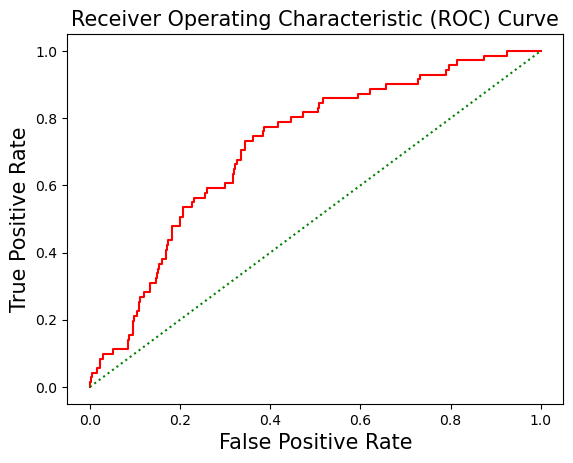

In [117]:
#Plotting the ROC
plt.plot(fpr1,tpr1, color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

In [118]:
#Calculate Area Under the Curver (AOC)
roc_auc = auc(fpr1,tpr1)
roc_auc.round(2)

0.72